<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#EDA-part-1" data-toc-modified-id="EDA-part-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA part 1</a></span><ul class="toc-item"><li><span><a href="#Ethinicity-of-the-workforce" data-toc-modified-id="Ethinicity-of-the-workforce-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ethinicity of the workforce</a></span><ul class="toc-item"><li><span><a href="#Grouped-salary-analysis" data-toc-modified-id="Grouped-salary-analysis-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Grouped salary analysis</a></span></li></ul></li></ul></li><li><span><a href="#EDA-part-2" data-toc-modified-id="EDA-part-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA part 2</a></span><ul class="toc-item"><li><span><a href="#Top-15-departments-(based-on-number-of-employees-)" data-toc-modified-id="Top-15-departments-(based-on-number-of-employees-)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Top 15 departments (based on number of employees )</a></span></li><li><span><a href="#Top-15-jobs-(based-on-number-of-employees)" data-toc-modified-id="Top-15-jobs-(based-on-number-of-employees)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Top 15 jobs (based on number of employees)</a></span></li><li><span><a href="#Top-15-department-with-most-nurses" data-toc-modified-id="Top-15-department-with-most-nurses-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Top 15 department with most nurses</a></span></li><li><span><a href="#Salary-of-clinical-nurses" data-toc-modified-id="Salary-of-clinical-nurses-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Salary of clinical nurses</a></span></li><li><span><a href="#Advanced-prac-registered-nurse" data-toc-modified-id="Advanced-prac-registered-nurse-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Advanced prac registered nurse</a></span><ul class="toc-item"><li><span><a href="#AGNP-hire-info" data-toc-modified-id="AGNP-hire-info-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>AGNP hire info</a></span></li><li><span><a href="#External-vs-internal-AGNP-hire:-salary-info" data-toc-modified-id="External-vs-internal-AGNP-hire:-salary-info-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>External vs internal AGNP hire: salary info</a></span></li><li><span><a href="#Classification-of-internal/external-hire-via-sankey-diagram" data-toc-modified-id="Classification-of-internal/external-hire-via-sankey-diagram-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Classification of internal/external hire via sankey diagram</a></span></li></ul></li></ul></li><li><span><a href="#EDA-part-3:-Salary-statistics-for-different-postions" data-toc-modified-id="EDA-part-3:-Salary-statistics-for-different-postions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA part 3: Salary statistics for different postions</a></span><ul class="toc-item"><li><span><a href="#Analysis:-full-time-and-part-time" data-toc-modified-id="Analysis:-full-time-and-part-time-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Analysis: full time and part time</a></span></li><li><span><a href="#Analysis-including-full-time-employees-only" data-toc-modified-id="Analysis-including-full-time-employees-only-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Analysis including full time employees only</a></span></li></ul></li></ul></div>

# Problem statement

We would like to analyze  salary dataset from a hospital system. This data contains the base salary for certain positions. In particular,
- We would like to develop a ML model for the nursing salaries based on the department, experience, ...
- Also we would address more about the details of hiring of nurse practitioners.

Most plots are interactive,please hover over the charts for detail.

In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import Series
from pandas import datetime
from datetime import timedelta
import dateutil.parser
import matplotlib
import sklearn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go

#import plotly.plotly as py1
import chart_studio.plotly  as py1
import plotly.offline as py
from plotly.offline import  iplot
py.init_notebook_mode(connected=True)
from plotly import tools
from plotly.tools import FigureFactory as ff
# import cufflinks and offline mode
#import cufflinks as cf
#cf.go_offline()


from IPython.core.display import display, HTML, Javascript
import json, random
from string import Template
from collections import Counter 

import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import anderson

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


print("Python Version: %s" % sys.version)
#print("Plotly Version: %s" % plotly.version)
#print("Cufflinks Version: %s" % cf.version)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Python Version: 3.6.7 | packaged by conda-forge | (default, Jul  2 2019, 02:18:42) 
[GCC 7.3.0]


# EDA part 1

In [3]:
#df0 = pd.read_csv('ut_md_anderson.xlsx', sep=',', header=None)
#df = pd.read_excel('data_last_updated2017/ut_md_anderson.xlsx', sep=',')
df = pd.read_csv('salary.csv', sep=',')
print("Number of rows in the dataset are : {}".format(len(df)))
df.columns = df.columns.str.replace(' ', '') #avoid the white space in column names for later use
df.head()

Number of rows in the dataset are : 19572


,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate
0,Asian,Male,Clinical Nurse,ATC - Bed/Chair Unit,2014-07-01,1.0,Full Time,40.0,2014-02-24,2014-02-24,77631.0,2014-07-01,2014-02-24
1,White,Female,Advanced Prac Registered Nurse,Breast Medical Oncology,2004-08-02,1.0,Full Time,40.0,2004-08-02,2004-08-02,130800.0,2010-11-01,2004-08-02
2,Asian,Female,Research Investigator,Genetics,2016-10-10,1.0,Full Time,40.0,2016-10-10,2016-10-10,53000.0,2016-10-10,2016-10-10
3,Black/African American,Female,Professor,Surgical Oncology,2011-04-01,1.0,Full Time,40.0,2005-09-01,2005-09-01,640000.0,2005-09-01,2005-09-01
4,Black/African American,Female,Financial Clearance Associate,Financial Clearance Center,2015-07-16,1.0,Full Time,40.0,2006-11-20,2006-11-20,43017.0,2014-02-16,2006-11-20


In [4]:
##let us see whether any data are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19572 entries, 0 to 19571
Data columns (total 13 columns):
EthnicGrpDescr       19572 non-null object
Gender               19572 non-null object
JobTitle             19572 non-null object
DeptName             19572 non-null object
JobEntryDate         19572 non-null object
FTE                  19572 non-null float64
Full/Part            19572 non-null object
STDHRS               19572 non-null float64
FirstStartDate       19570 non-null object
LastStartDt          19572 non-null object
AnnualRate           19572 non-null float64
PositionEntryDate    19570 non-null object
OriginalStartDate    19570 non-null object
dtypes: float64(3), object(10)
memory usage: 1.9+ MB


In [5]:
#and what percent is it?
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['TotalMissing', 'PercentMissing'])
missing_data

,TotalMissing,PercentMissing
OriginalStartDate,2,0.010219
PositionEntryDate,2,0.010219
FirstStartDate,2,0.010219
AnnualRate,0,0.000000
LastStartDt,0,0.000000
STDHRS,0,0.000000
Full/Part,0,0.000000
FTE,0,0.000000
JobEntryDate,0,0.000000
DeptName,0,0.000000


Looks like  a few (2) of them doesn't have some info, let us drop them 

In [6]:
#drop the rows with na values
df= df.dropna(axis=0)
#df.info()

In [7]:
#data was collected on this date, so set this as our reference date
refDate=datetime(year=2017, month=9, day=20)
print("Reference date", refDate)

Reference date 2017-09-20 00:00:00


In [8]:
#add some columns with number of years in current pos etc
#first convert the relevant columns via pandas date_time
df['JobEntryDate']=pd.to_datetime(df['JobEntryDate'])
df['FirstStartDate']=pd.to_datetime(df['FirstStartDate'])

df['nYcurPos'] = (refDate - df['JobEntryDate']) / np.timedelta64(1, 'Y') #number of years in current position
df['nYatInst'] = (refDate - df['FirstStartDate']) / np.timedelta64(1, 'Y') #number of years at institute
df['hireInfo'] = np.where((df['nYatInst'] > df['nYcurPos']), 1.0, 0.0) # 1 for internal hire 
df.head(5)

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
0,Asian,Male,Clinical Nurse,ATC - Bed/Chair Unit,2014-07-01,1.0,Full Time,40.0,2014-02-24,2014-02-24,77631.0,2014-07-01,2014-02-24,3.222517,3.570231,1.0
1,White,Female,Advanced Prac Registered Nurse,Breast Medical Oncology,2004-08-02,1.0,Full Time,40.0,2004-08-02,2004-08-02,130800.0,2010-11-01,2004-08-02,13.133740,13.133740,0.0
2,Asian,Female,Research Investigator,Genetics,2016-10-10,1.0,Full Time,40.0,2016-10-10,2016-10-10,53000.0,2016-10-10,2016-10-10,0.944578,0.944578,0.0
3,Black/African American,Female,Professor,Surgical Oncology,2011-04-01,1.0,Full Time,40.0,2005-09-01,2005-09-01,640000.0,2005-09-01,2005-09-01,6.472412,12.052267,1.0
4,Black/African American,Female,Financial Clearance Associate,Financial Clearance Center,2015-07-16,1.0,Full Time,40.0,2006-11-20,2006-11-20,43017.0,2014-02-16,2006-11-20,2.182112,10.833898,1.0


In [9]:
tmp=len(df[df['hireInfo'] == 1.0])
print("Number of rows in the dataset are : {}".format(tmp))
print ("Overall internal hire is", round(tmp/len(df),4)*100, "%")

Number of rows in the dataset are : 12502
Overall internal hire is 63.89 %


Looks like the majority is being hired internally, which makes sense for a large institution as the career advancement progresses

In [10]:
df.describe()

,FTE,STDHRS,AnnualRate,nYcurPos,nYatInst,hireInfo
count,19568.000000,19568.000000,19568.000000,19568.000000,19568.000000,19568.000000
mean,0.974735,38.987664,85057.957938,3.907736,8.923249,0.638900
std,0.101802,4.078957,81200.228845,3.346617,7.401988,0.480332
min,0.000000,4.000000,3120.000000,0.021903,0.021903,0.000000
25%,1.000000,40.000000,43500.000000,1.470256,2.726955,0.000000
50%,1.000000,40.000000,63988.500000,2.880278,7.154151,1.000000
75%,1.000000,40.000000,94667.000000,6.053512,13.287063,1.000000
max,1.000000,40.000000,931825.000000,27.053259,47.305557,1.000000


In [11]:
#some intresting observations
#based on above table let us see, who works at the inst for more than 47 years
df_tmp = df[df['nYatInst'] > 45.0]
df_tmp

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
16272,White,Male,Professor,Biostatistics,2011-01-17,0.2,Part Time,8.0,1970-06-01,2005-10-01,23660.0,2005-10-01,1970-06-01,6.675017,47.305557,1.0


In [12]:
#who works at the inst for more than 27 years at same position
df_tmp = df[df['nYcurPos'] > 27.0]
df_tmp

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
9963,White,Male,Chair,Neurosurgery,1990-09-01,1.0,Full Time,40.0,1990-09-01,1990-09-01,927464.0,2003-01-01,1990-09-01,27.053259,27.053259,0.0


In [13]:
#what are the difference det and the employee strength
#var='DeptName'
#getUniqueInCol(df,var)

In [14]:
#unique job titles
#var='JobTitle'
#getUniqueInCol(df,var)

## Ethinicity of the workforce

In [15]:
simple_graph(df,'EthnicGrpDescr', 'pie', title='Ethinicity')

### Grouped salary analysis

- Let us look at some of the salaries based on some arbitrary salary cutoffs. Note that the salries we have  are the base salaries as reported. This probably doesn't include overtime, shift (day/night/weekend) differentials and other increments/bonuses etc. 

In [16]:
#who gets a maximum of 10K per year
hiSalCutoff=10000.0
df_out=grouped_dfInfo(df,'JobTitle',hiSalCutoff)
df_out.head(20)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
Patient Escort,9888.0,9888.0,NaN,1.0,9888.0,9888.0
Research Technician I,9500.0,9500.0,NaN,1.0,9500.0,9500.0
Student Extern,9360.0,9360.0,NaN,1.0,9360.0,9360.0
Clerk,26412.0,8804.0,157.787832,3.0,8652.0,8967.0
Paramedic,4584.0,4584.0,NaN,1.0,4584.0,4584.0
Per Diem Patient Care Tech,3120.0,3120.0,NaN,1.0,3120.0,3120.0


Some of these positions have just one person only, probably part time too

In [17]:
#who are the in top most band of  75K per year
hiSalCutoff=75000.0
df_out=grouped_dfInfo(df,'JobTitle',hiSalCutoff)
df_out.head(20)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
"Mgr, Room Service",134739.0,67369.500000,10789.742374,2.0,59740.0,74999.0
"Sr Coord, Pediatrics School",74998.0,74998.000000,NaN,1.0,74998.0,74998.0
PET Technologist,619887.0,68876.333333,9793.943281,9.0,43329.0,74988.0
Research Scientist,8467099.0,59210.482517,10716.539914,143.0,14200.0,74984.0
"Coord, Financial Clearance",146020.0,73010.000000,2771.858582,2.0,71050.0,74970.0
Sr Medical Technologist,4290576.0,68104.380952,2841.743146,63.0,64030.0,74968.0
"Assoc Dir, Development",424893.0,70815.500000,3881.396025,6.0,65178.0,74957.0
Financial Analyst,2364973.0,67570.657143,5117.396546,35.0,57600.0,74952.0
Instructor,7292224.0,59286.373984,5852.325311,123.0,47840.0,74944.0


In [18]:
#who are the in top most layer of   100K per year
hiSalCutoff=100000.0
df_out=grouped_dfInfo(df,'JobTitle',hiSalCutoff)
df_out.head(20)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
"Supv, Diagnostic Imaging",1735466.0,91340.315789,5959.100949,19.0,80607.0,99996.0
Physician Asst,9125156.0,90348.079208,8920.907142,101.0,56142.0,99993.0
Sr Clinical Res Quality Spec,1734991.0,96388.388889,4067.485177,18.0,85694.0,99984.0
Sr Decision Support Specialist,267362.0,89120.666667,9611.016717,3.0,81677.0,99971.0
Sr Facilities Project Manager,488910.0,97782.000000,2248.554980,5.0,94576.0,99969.0
Sr Research Nurse,4562646.0,91252.920000,6787.023909,50.0,74566.0,99968.0
Radiation Therapist,7345459.0,84430.563218,14690.537999,87.0,29925.0,99966.0
Sr Software Developer,288828.0,96276.000000,5462.932546,3.0,90000.0,99964.0
Pharmacist,1156152.0,82582.285714,18192.952023,14.0,60093.0,99959.0


In [19]:
#who are the in top band  who makes at least   500K per year
hiSalCutoff=500000.0
df_out=grouped_dfInfo(df,'JobTitle',hiSalCutoff)
df_out.head(20)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
Chair,13294116.0,415441.125000,57047.206290,32.0,240000.0,499779.0
Assistant Professor,103199959.0,209756.014228,111321.440698,492.0,47669.0,499000.0
Professor,138372877.0,318098.567816,107858.791982,435.0,23660.0,498485.0
"VP, Cancer Prevention",492500.0,492500.000000,NaN,1.0,492500.0,492500.0
Associate Professor,109688190.0,256881.007026,109263.897437,427.0,59738.0,491248.0
"SrVP, Strategic Network Devt",490000.0,490000.000000,NaN,1.0,490000.0,490000.0
Division Head,490000.0,490000.000000,NaN,1.0,490000.0,490000.0
"VP, Clinical Education",485700.0,485700.000000,NaN,1.0,485700.0,485700.0
"VP, Clinical Research Admin",482500.0,482500.000000,NaN,1.0,482500.0,482500.0


In [20]:
#now the top most job titles
df_out=grouped_dfInfo(df,'JobTitle')
df_out.head(20)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
Division Head,3676056.0,612676.000000,162547.950177,6.0,490000.0,931825.0
Chair,25105024.0,492255.372549,130977.548499,51.0,240000.0,927464.0
"Deputy President, COO",880000.0,880000.000000,NaN,1.0,880000.0,880000.0
Professor,172878202.0,352812.657143,144969.503281,490.0,23660.0,858300.0
President Ad Interim,787317.0,787317.000000,NaN,1.0,787317.0,787317.0
SrVP and CFO,750000.0,750000.000000,NaN,1.0,750000.0,750000.0
"EVP, Administration",744300.0,744300.000000,NaN,1.0,744300.0,744300.0
Associate Professor,118838339.0,268865.020362,125572.024344,442.0,59738.0,679000.0
SrVP & Chf Clin Ofc Ad Interim,665337.0,665337.000000,NaN,1.0,665337.0,665337.0


# EDA part 2

Looks like those with less than 50K have lower FTE and they are part time. Let us clean up the dataframe for only fulltime nurses

In [21]:
#group by department names and look at the job titles 
#and number of persons in that capacity
#dfr=df['JobTitle'].groupby(df['DeptName']).value_counts()
#dfr

In [22]:
# top 20 dept in terms of salary
group_by_dept = df.groupby("DeptName").AnnualRate.sum().nlargest(20)
print(group_by_dept)

DeptName
Radiation Oncology Department     32553008.0
Leukemia                          29075098.0
Anesthesiology & PeriOper Med     26995300.0
Surgical Oncology                 23137122.0
Pathology, Anatomical             21555819.0
Diag Rad - Body Imaging           17290185.0
Plastic Surgery                   16357765.0
Main OR Nursing                   16096871.0
Stem Cell Transplantation         15785558.0
Pharmacy Inpatient                15656613.0
Invest. Cancer Therapeutics       14811058.0
Anesthesiology - CRNA Support     14787839.0
Gyn Onc & Reproductive Med        14695501.0
Fac Mgt-PC&PF-Bld Care & Ops      13853633.0
Lymphoma/Myeloma                  13682441.0
ATC - Bed/Chair Unit              13351579.0
Diag Rad - Breast Imaging         12797245.0
Head & Neck Surgery               12198643.0
Genitourinary Medical Oncology    11768530.0
GI Medical Oncology               11557543.0
Name: AnnualRate, dtype: float64


## Top 15 departments (based on number of employees )

In [23]:
bubble_chart('DeptName',df,npoints=15,title='No. of employees vs Dept',fac=0.15)

## Top 15 jobs (based on number of employees)

In [24]:
simple_graph(df,'JobTitle','barv',title='No. of clinical nurse vs Salary',top =15)

## Top 15 department with most nurses

In [25]:
nurseAll_df = df[df['JobTitle'] == 'Clinical Nurse'].dropna() #df with clinical nurses
bubble_chart('DeptName',nurseAll_df,npoints=15,title='No. of clinical nurses vs Dept',fac=0.4)

## Salary of clinical nurses

In [26]:
simple_graph(nurseAll_df,'AnnualRate','histo',title='No. of clinical nurse vs Salary')

There is quite a bit of spread, from low 30's to all the way to about 100 K. Let us take a closer look


In [27]:
simple_graph(nurseAll_df,'nYcurPos','histo',title='No. of year at current position ')

In [28]:
nurseAll_df.head(10)

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
0,Asian,Male,Clinical Nurse,ATC - Bed/Chair Unit,2014-07-01,1.0,Full Time,40.0,2014-02-24,2014-02-24,77631.0,2014-07-01,2014-02-24,3.222517,3.570231,1.0
13,Asian,Female,Clinical Nurse,Main OR Nursing,2011-01-20,1.0,Full Time,40.0,2006-03-13,2006-03-13,95000.0,2010-01-01,2006-03-13,6.666804,11.523851,1.0
30,Asian,Male,Clinical Nurse,Nursing 6P,2016-01-25,0.9,Part Time,36.0,2016-01-25,2016-01-25,55000.0,2016-01-25,2016-01-25,1.653696,1.653696,0.0
37,White,Female,Clinical Nurse,Nrsg Clinical Decision Unit,2016-02-22,0.9,Part Time,36.0,2016-02-22,2016-02-22,50400.0,2016-02-22,2016-02-22,1.577034,1.577034,0.0
56,Asian,Female,Clinical Nurse,Nursing Resource Pool,2017-08-07,0.9,Part Time,36.0,1999-03-08,2017-08-07,76752.0,2017-08-07,1999-03-08,0.120468,18.538368,1.0
70,Asian,Female,Clinical Nurse,Nursing G16,2011-01-26,0.9,Part Time,36.0,2007-12-10,2007-12-10,77793.0,2007-12-10,2007-12-10,6.650376,9.779804,1.0
74,Asian,Female,Clinical Nurse,Interventional Rad Clin Ops,2010-12-06,1.0,Full Time,40.0,2010-05-24,2010-05-24,77557.0,2014-07-01,2010-05-24,6.790009,7.326639,1.0
90,Asian,Female,Clinical Nurse,Main OR Nursing,2016-12-12,1.0,Full Time,40.0,2016-12-12,2016-12-12,78000.0,2016-12-12,2016-12-12,0.772090,0.772090,0.0
91,Asian,Female,Clinical Nurse,Nursing Resource Pool,2010-08-19,1.0,Full Time,40.0,2002-04-29,2002-04-29,94667.0,2003-03-16,2002-04-29,7.088441,15.395251,1.0
122,Asian,Male,Clinical Nurse,Infusion Therapy,2004-09-13,1.0,Full Time,40.0,2004-09-13,2004-09-13,95000.0,2010-01-16,2004-09-13,13.018748,13.018748,0.0


In [29]:
nurseAll_df[nurseAll_df.AnnualRate < 50000.0]

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
184,Asian,Female,Clinical Nurse,Nursing 9P,2012-11-12,0.60,Part Time,24.0,2012-11-12,2012-11-12,49719.0,2012-11-12,2012-11-12,4.854309,4.854309,0.0
233,Asian,Female,Clinical Nurse,ATC - Bed/Chair Unit,2011-04-20,0.50,Part Time,20.0,1991-11-25,2006-02-13,47500.0,2006-02-13,1991-11-25,6.420392,25.821201,1.0
906,Asian,Female,Clinical Nurse,Nursing G16,2011-01-26,0.60,Part Time,24.0,2010-06-28,2010-06-28,46131.0,2010-06-28,2010-06-28,6.650376,7.230812,1.0
1259,Asian,Male,Clinical Nurse,Nursing G17,2013-02-01,0.60,Part Time,24.0,2012-09-10,2012-09-10,39903.0,2012-09-10,2012-09-10,4.632539,5.026797,1.0
1649,Asian,Female,Clinical Nurse,Nursing G17,2012-02-16,0.60,Part Time,24.0,2011-09-26,2011-09-26,41715.0,2011-09-26,2011-09-26,5.593544,5.985065,1.0
1884,White,Female,Clinical Nurse,Nursing G22,2012-09-01,0.60,Part Time,24.0,2012-04-09,2012-04-09,42080.0,2014-09-01,2012-04-09,5.051438,5.448435,1.0
1964,Black/African American,Female,Clinical Nurse,Nursing Resource Pool,2011-01-26,0.60,Part Time,24.0,2007-04-23,2007-04-23,43800.0,2014-08-01,2007-04-23,6.650376,10.412260,1.0
2028,Asian,Female,Clinical Nurse,Nursing G22,2014-02-10,0.60,Part Time,24.0,2014-02-10,2014-02-10,39600.0,2014-02-10,2014-02-10,3.608561,3.608561,0.0
2286,Asian,Female,Clinical Nurse,Nursing G15,2014-02-10,0.60,Part Time,24.0,2014-02-10,2014-02-10,39600.0,2014-02-10,2014-02-10,3.608561,3.608561,0.0
2287,Asian,Female,Clinical Nurse,Nursing G17,2013-04-22,0.60,Part Time,24.0,2010-04-12,2013-04-22,47237.0,2013-04-22,2010-04-12,4.413506,7.441631,1.0


Looks like those with less than 50K have lower FTE; they are part time. Let us clean up the dataframe for only fulltime nurses which helps us in ML studies

In [30]:
nurseFT_df =  df[(df['JobTitle'] == 'Clinical Nurse') & (df['Full/Part'] =='Full Time')] # full time nurse
print("Total number of full time nurses:", nurseFT_df.shape[0])
simple_graph(nurseFT_df,'AnnualRate','histo',title='No. of clinical nurse (FT) vs Salary')

Total number of full time nurses: 703


In [31]:
nurseFT_df.head()
#nurseFT_df.shape

,EthnicGrpDescr,Gender,JobTitle,DeptName,JobEntryDate,FTE,Full/Part,STDHRS,FirstStartDate,LastStartDt,AnnualRate,PositionEntryDate,OriginalStartDate,nYcurPos,nYatInst,hireInfo
0,Asian,Male,Clinical Nurse,ATC - Bed/Chair Unit,2014-07-01,1.0,Full Time,40.0,2014-02-24,2014-02-24,77631.0,2014-07-01,2014-02-24,3.222517,3.570231,1.0
13,Asian,Female,Clinical Nurse,Main OR Nursing,2011-01-20,1.0,Full Time,40.0,2006-03-13,2006-03-13,95000.0,2010-01-01,2006-03-13,6.666804,11.523851,1.0
74,Asian,Female,Clinical Nurse,Interventional Rad Clin Ops,2010-12-06,1.0,Full Time,40.0,2010-05-24,2010-05-24,77557.0,2014-07-01,2010-05-24,6.790009,7.326639,1.0
90,Asian,Female,Clinical Nurse,Main OR Nursing,2016-12-12,1.0,Full Time,40.0,2016-12-12,2016-12-12,78000.0,2016-12-12,2016-12-12,0.772090,0.772090,0.0
91,Asian,Female,Clinical Nurse,Nursing Resource Pool,2010-08-19,1.0,Full Time,40.0,2002-04-29,2002-04-29,94667.0,2003-03-16,2002-04-29,7.088441,15.395251,1.0


In [32]:
#convert the number of year at current position to average years    
nurseFTagg_df=convert_years(nurseFT_df,'nYcurPos','avyear') 
#nurseFT_df.shape

/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/ipykernel_launcher.py:210: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
#group by avergae year and find the mean , std dev of salaries of each year band
df_tmp=nurseFTagg_df.groupby('avyear')["AnnualRate"].agg([np.mean, np.std, 'count'])
df_tmp = df_tmp.reset_index()
#rename the column, so that we dont mess with default names of methods
df_tmp.columns = ['avyear','agg_mean','agg_sd','agg_count']
df_tmp

,avyear,agg_mean,agg_sd,agg_count
0,1.0,73559.786885,11947.643640,183
1,3.0,77674.294118,11099.765770,119
2,5.0,82826.641509,9519.282610,106
3,7.0,91668.348214,5475.479911,224
4,9.0,92574.950000,3170.070686,20
5,11.0,93704.714286,1608.692323,14
6,13.0,92949.818182,3121.815620,11
7,15.0,94868.000000,162.499231,4
8,17.0,93869.222222,1478.162438,9
9,19.0,94894.400000,152.608322,5


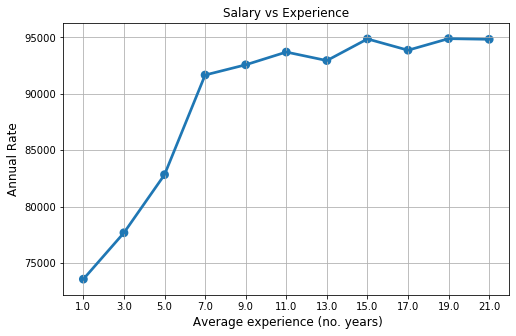

In [34]:
x=df_tmp.avyear
y=df_tmp.agg_mean 
y_err=df_tmp.agg_sd
pointPlot_sns(x,y, 'Salary vs Experience', 'Annual Rate', ' Average experience (no. years)')

Clearly there is a significant jump after 5 years of experience, does vesting (retirement) play a role?. Retaining employees with experience who might otherwise look for other opportunities?

## Advanced prac registered nurse

In [45]:
agnpAll_df = df[df['JobTitle'] == 'Advanced Prac Registered Nurse'].dropna() #df with AGNP
print("Total number of AGNPs:", agnpAll_df.shape[0])

Total number of AGNPs: 325


In [46]:
agnpFT_df = df[(df['JobTitle'] == 'Advanced Prac Registered Nurse') & (df['Full/Part'] =='Full Time')]  #df with AGNP
print("Total number of fulltime AGNPs:", agnpFT_df.shape[0])
                
#nurseFT_df =  df[(df['JobTitle'] == 'Clinical Nurse') & (df['Full/Part'] =='Full Time')] # full time nurse
#print("Total number of full time nurses:", nurseFT_df.shape[0])           
                

Total number of fulltime AGNPs: 313


In [47]:
# Number of  AGNP vs Dept
bubble_chart('DeptName',agnpAll_df,npoints=15,title='No. of AGNP vs Dept',fac=2.)

In [48]:
##Salary of  Advanced Prac Registered Nurse (fulltime)
simple_graph(agnpFT_df,'AnnualRate','histo',title='No of AGNPs vs Salary')

In [49]:
#convert the number of year at current position to average years    
df_tmp=convert_years(agnpFT_df,'nYcurPos','avyear') 
#group by avergae year and find the mean , std dev of salaries of each year band
df_tmp=df_tmp.groupby('avyear')["AnnualRate"].agg([np.mean, np.std, 'count'])
df_tmp =df_tmp.reset_index()
##rename the column, so that we dont mess with default names of methods
df_tmp.columns = ['avyear','agg_mean','agg_sd','agg_count']
df_tmp

/home/installed/anaconda3/install/envs/envUdacity/lib/python3.6/site-packages/ipykernel_launcher.py:210: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,avyear,agg_mean,agg_sd,agg_count
0,1.0,109950.529412,9632.393830,85
1,3.0,113496.438202,8347.177536,89
2,5.0,118744.875000,8263.760347,32
3,7.0,126176.542373,6131.725853,59
4,9.0,127672.750000,3990.207648,8
5,11.0,129555.153846,2213.727055,13
6,13.0,129528.750000,2544.690555,12
7,15.0,130800.000000,NaN,1
8,17.0,130800.000000,0.000000,4
9,19.0,130186.100000,1090.147437,10


### AGNP hire info

In [50]:
tmp=len(agnpAll_df[agnpAll_df['hireInfo'] == 1])
print("Number of rows in the dataset are : {}".format(tmp))
print ("Overall internal hire is", round(tmp/len(agnpAll_df),4)*100, "%")


Number of rows in the dataset are : 230
Overall internal hire is 70.77 %


In [51]:
tmp_df=agnpAll_df[agnpAll_df['hireInfo'] == 1]
tmp_df.head(10)
#in previous year which dept do external new hires
bubble_chart('DeptName',tmp_df,npoints=20,title='No. of AGNP internal hires vs Dept',fac=2.0)

In [52]:
tmp_df=agnpAll_df[agnpAll_df['nYcurPos'] <= 1.0]
tmp_df.head(10)
print ("Total number of AGNPs hired previous year", len(tmp_df))
#external new hires
#tmp_df1=agnpAll_df[(agnpAll_df['hireInfo'] == 0) & (agnpAll_df['nYcurPos'] <= 1.0) ]
tmp_df1=tmp_df[(tmp_df['hireInfo'] == 0)]
#internal new hires
tmp_df2=tmp_df[(tmp_df['hireInfo'] == 1)]
print ("AGNP: Internal new hire percentage for previous year", round(len(tmp_df2)/len(tmp_df)*100,2),"%")

Total number of AGNPs hired previous year 26
AGNP: Internal new hire percentage for previous year 65.38 %


### External vs internal AGNP hire: salary info

In [53]:

fig = go.Figure(data=[trace0,trace1], layout=layout)
py.iplot(fig)    


### Classification of internal/external hire via sankey diagram  

In [54]:
agnpAll_df['DeptName'].value_counts().nlargest(15)

Leukemia                          25
Stem Cell Transplantation         23
Lymphoma/Myeloma                  23
Genitourinary Medical Oncology    18
Gyn Onc & Reproductive Med        17
Breast Medical Oncology           15
Endocrine Neoplasia and HD        13
Neurosurgery                      11
Critical Care& RespiratoryCare     9
Surgical Oncology                  9
Pediatrics - Patient Care          9
Palliative Care Med                9
Thoracic/Head & Neck Med Onc       9
General Internal Med               8
Invest. Cancer Therapeutics        8
Name: DeptName, dtype: int64

In [55]:
#sankey diagram

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

# EDA part 3: Salary statistics for different postions

Please use the drop down menu, to see salary distribution of different positions. Some specific titles are combined together to form a drop down menu

## Analysis: full time and part time

In [57]:

salaryStat(df)    

## Analysis including full time employees only

In [58]:
df_FT =  df[(df['Full/Part'] =='Full Time')] # full time
#analysis including only fulltime 
salaryStat(df_FT)